# Práctica 1: Uso de una herramienta para desplegar un modelo de inteligencia artificial
## Dataset: Google Play Store
Dataset descargado desde: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

## Enlace compartido para acceder a este notebook:
https://drive.google.com/file/d/1hRpbwE6ndoQ-YZfFpxYUJ4cX1qTry_6V/view?usp=sharing




In [ ]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Cargar el archivo googleplaystore.csv
df = pd.read_csv('/content/sample_data/Salary_dataset.csv')

In [ ]:
# Visualizar los primeros registros
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [ ]:
# Separar las variables independiente (X) y dependiente (y)
X = df[['YearsExperience']]
y = df['Salary']

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MAE: 6286.45
R²: 0.90


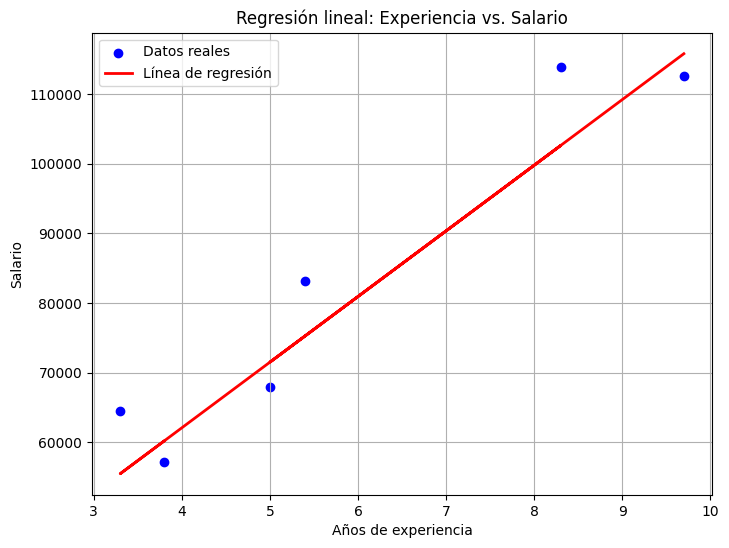

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Regresión lineal: Experiencia vs. Salario')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Intalar librerías
!pip install mlflow --quiet
!pip install pyngrok --quiet

In [ ]:
# Importar librerías
import mlflow
import mlflow.sklearn

In [ ]:
mlflow.set_experiment("Predicción de Salarios")

<Experiment: artifact_location='file:///content/mlruns/577967795547298450', creation_time=1747627689751, experiment_id='577967795547298450', last_update_time=1747627689751, lifecycle_stage='active', name='Predicción de Salarios', tags={}>

In [ ]:
from google.colab import userdata
Token = userdata.get('ngrok_key')

In [ ]:
# Colocamos la solución en el puerto 9090
get_ipython().system_raw("mlflow ui --port 9090 &")
mlflow.set_tracking_uri("http://localhost:9090")

In [ ]:
# Autenticación en la plataforma Ngrok
from pyngrok import ngrok
ngrok.set_auth_token(Token)

In [ ]:
# Solicitar IP pública para revisar la tarea
public_url  = ngrok.connect(9090).public_url
print('mlflow UI URL: ', public_url)

mlflow UI URL:  https://867f-34-169-65-11.ngrok-free.app


In [ ]:
# Configuración de parámetros que se muestran en Ngrok
with mlflow.start_run():
  mlflow.log_param('data-path', '/content/sample_data/Salary_dataset.csv')
  mlflow.log_param('train-test-split-size', 0.2)
  mlflow.log_param('random-state', 42)
  mlflow.sklearn.log_model(model, 'model')
  mlflow.log_metric('mae', mae)
  mlflow.log_metric('r2', r2)
  mlflow.log_artifact('/content/sample_data/Salary_dataset.csv')

2025/05/19 04:47:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run traveling-shad-502 at: http://localhost:9090/#/experiments/577967795547298450/runs/859951e893454271b65cb8e875d129ff
🧪 View experiment at: http://localhost:9090/#/experiments/577967795547298450


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Cargar modelo
model = joblib.load('linear_model.pkl')

# Crear app Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "Servicio activo para predicción de salarios"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    years_experience = data.get('YearsExperience')

    # Validación simple
    if years_experience is None:
        return jsonify({'error': 'YearsExperience no proporcionado'}), 400

    # Convertir la entrada a un formato que el modelo pueda usar (NumPy array)
    # Ensure the input is a 2D array as expected by sklearn models
    try:
        years_experience_array = np.array([[float(years_experience)]])
    except ValueError:
        return jsonify({'error': 'YearsExperience debe ser un número válido'}), 400

    # Realizar predicción
    predicted_salary = model.predict(years_experience_array)

    # Devolver el resultado como JSON
    return jsonify({'predicted_salary': predicted_salary[0]})

if __name__ == '__main__':
    # This is typically used when running the script directly
    # In a Colab environment with ngrok, you might not need this block to run the app directly
    # Instead, you would run the Flask app using a command line tool or a separate process
    # For simplicity and demonstration, you might keep it if you were running app.py locally
    pass

Overwriting app.py


In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from app import app

run_with_ngrok(app)  # Inicia Flask y lo expone con ngrok
app.run()


 * Serving Flask app 'app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://867f-34-169-65-11.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
!curl -X POST https://7c82-34-169-65-11.ngrok-free.app/predict \
     -H "Content-Type: application/json" \
     -d '{"YearsExperience": 3.5}'